# Lab:  Logistic Regression for Gene Expression Data

In this lab, we use logistic regression to predict biological characteristics ("phenotypes") from gene expression data.  In addition to the concepts in [breast cancer demo](./breast_cancer.ipynb), you will learn to:
* Handle missing data
* Perform multi-class logistic classification
* Create a confusion matrix
* Use L1-regularization for improved estimation in the case of sparse weights (Grad students only)

## Background

Genes are the basic unit in the DNA and encode blueprints for proteins.  When proteins are synthesized from a gene, the gene is said to "express".  Micro-arrays are devices that measure the expression levels of large numbers of genes in parallel.  By finding correlations between expression levels and phenotypes, scientists can identify possible genetic markers for biological characteristics.

The data in this lab comes from:

https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

In this data, mice were characterized by three properties:
* Whether they had down's syndrome (trisomy) or not
* Whether they were stimulated to learn or not
* Whether they had a drug memantine or a saline control solution.

With these three choices, there are 8 possible classes for each mouse.  For each mouse, the expression levels were measured across 77 genes.  We will see if the characteristics can be predicted from the gene expression levels.  This classification could reveal which genes are potentially involved in Down's syndrome and if drugs and learning have any noticeable effects.


## Load the Data

We begin by loading the standard modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

Use the `pd.read_excel` command to read the data from 

https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls

into a dataframe `df`.  Use the `index_col` option to specify that column 0 is the index.  Use the `df.head()` to print the first few rows.

In [2]:
# TODO
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls',index_col=0,na_values='?')
df.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
MouseID                                                                         
309_1    0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
309_2    0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
309_3    0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
309_4    0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
309_5    0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

         pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
MouseID                                 ...                                  
309_1     2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
309_2     2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
309_3     2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
309_4     2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
309_5     2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   

           EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
MouseID                                                                       
309_1    0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
309_2    0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
309_3    0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
309_4    0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
309_5    0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 81 columns]

This data has missing values.  The site:

http://pandas.pydata.org/pandas-docs/stable/missing_data.html

has an excellent summary of methods to deal with missing values.  Following the techniques there, create a new data frame `df1` where the missing values in each column are filled with the mean values from the non-missing values.

In [3]:
# TODO
df1 = df.fillna(df.mean())

<ipython-input-3-6c6777e82c95>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df.fillna(df.mean())


## Binary Classification for Down's Syndrome

We will first predict the binary class label in `df1['Genotype']` which indicates if the mouse has Down's syndrome or not.  Get the string values in `df1['Genotype'].values` and convert this to a numeric vector `y` with 0 or 1.  You may wish to use the `np.unique` command with the `return_inverse=True` option.

In [4]:
# TODO
y1=df1['Genotype'].values
y = (y1 == 'Control').astype(int)
y = np.unique(y,return_inverse=True)[1]

As predictors, get all but the last four columns of the dataframes.  Store the data matrix into `X` and the names of the columns in `xnames`.

In [5]:
# TODO
xnames=df1.columns[:-4]
X=np.array(df1[xnames].values)

Split the data into training and test with 30% allocated for test.  You can use the train

In [6]:
from sklearn.model_selection import train_test_split

# TODO:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=27)

Scale the data with the `StandardScaler`.  Store the scaled values in `Xtr1` and `Xts1`. 

In [10]:
from sklearn.preprocessing import StandardScaler

# TODO
Xtr1 = StandardScaler().fit_transform(Xtr)
Xts1 = StandardScaler().fit_transform(Xts)

Create a `LogisticRegression` object `logreg` and `fit` on the scaled training data.  Set the regularization level to `C=1e5` and use the optimizer `solver=liblinear`. 

In [12]:
# TODO
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear',multi_class='ovr')
logreg.fit(Xtr1,ytr)

LogisticRegression(C=100000.0, multi_class='ovr', solver='liblinear')

Measure the accuracy of the classifer on test data.  You should get around 94%.  

In [13]:
# TODO
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts) 
W = logreg.coef_
print('The Accuracy for Multiclass Logistic Regression is: %.5f'%acc)

The Accuracy for Multiclass Logistic Regression is: 0.96296


## Interpreting the weight vector

Create a stem plot of the coefficients, `W` in the logistic regression model.  Jse the `plt.stem()` function with the `use_line_collection=True` option.  You can get the coefficients from `logreg.coef_`, but you will need to reshape this to a 1D array.  

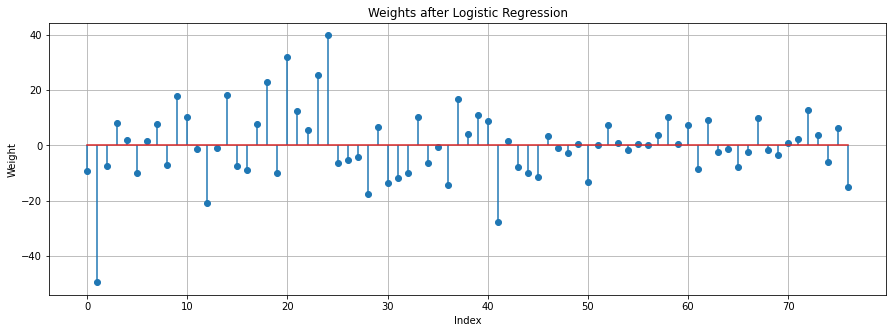

In [14]:
# TODO
W = np.reshape(logreg.coef_,(77,1))
plt.figure(figsize=(15,5))
plt.stem(W,use_line_collection=True)
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Weights after Logistic Regression')
plt.grid()

You should see that `W[i]` is very large for a few components `i`.  These are the genes that are likely to be most involved in Down's Syndrome.   Below we will use L1 regression to enforce sparsity.  Find the names of the genes for two components `i` where the magnitude of `W[i]` is largest.  

In [15]:
# TODO
max1, max2 = abs(W[:,0]).argsort()[0:2]
print('Names of the TWO most likely genes are', df.columns[max1], '     and    ', df.columns[max2])

Names of the TWO most likely genes are RRP1_N      and     Tau_N


## Cross Validation

To obtain a slightly more accurate result, now perform 10-fold cross validation and measure the average precision, recall and f1-score.  Note, that in performing the cross-validation, you will want to randomly permute the test and training sets using the `shuffle` option.  In this data set, all the samples from each class are bunched together, so shuffling is essential.  Print the mean precision, recall and f1-score and error rate across all the folds.

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)

# TODO
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold=10
kf= KFold(n_splits=nfold,shuffle=True)
prec=[]
rec=[]
f1=[]
err_rate=[]

for Itr, Its in kf.split(X):
    Xtr=X[Itr,:]
    ytr=y[Itr]
    Xts=X[Its,:]
    yts=y[Its]
    
    logreg.fit(Xtr,ytr)
    
    yhat=logreg.predict(Xts)
    preci,reci,f1i,_=precision_recall_fscore_support(yts,yhat,average='micro')
    
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    
    err_rate.append(np.mean(yts != yhat))
prec=np.mean(prec)
rec=np.mean(rec)
f1=np.mean(f1)
err_mean=np.mean(err_rate)

print('The mean precision is: %.5f'%prec)
print('The mean recall is: %.5f'%rec)
print('The mean f1 score is: %.5f'%f1) 
print('The mean error rate is: %.5f'%err_mean)

The mean precision is: 0.95833
The mean recall is: 0.95833
The mean f1 score is: 0.95833
The mean error rate is: 0.04167


## Multi-Class Classification

Now use the response variable in `df1['class']`.  This has 8 possible classes.  Use the `np.unique` funtion as before to convert this to a vector `y` with values 0 to 7.

In [17]:
# TODO
y = np.unique(df1['class'].values,return_inverse=True)[1]

Fit a multi-class logistic model by creating a `LogisticRegression` object, `logreg` and then calling the `logreg.fit` method.

Now perform 10-fold cross validation, and measure the confusion matrix `C` on the test data in each fold. You can use the `confustion_matrix` method in the `sklearn` package.  Add the confusion matrix counts across all folds and then normalize the rows of the confusion matrix so that they sum to one.  Thus, each element `C[i,j]` will represent the fraction of samples where `yhat==j` given `ytrue==i`.  Print the confusion matrix.  You can use the command

    print(np.array_str(C, precision=4, suppress_small=True))
    
to create a nicely formatted print.  Also print the overall mean and SE of the test accuracy across the folds.

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# TODO
acc = []; prec = []; rec = []; f1 = [] 
kf = KFold(n_splits=10,shuffle=True)
Conf = np.zeros((8,8))

for train,test in kf.split(X):
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    logreg.fit(Xtr,ytr)
    yhat = logreg.predict(Xts)
    acc.append(np.mean(yhat == yts))
    preci, reci, f1i, _ = precision_recall_fscore_support(yts,yhat)
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    Conf = Conf + confusion_matrix(yts,yhat)
    
mprec = np.mean(prec)
mrec = np.mean(rec)
mean_f1 = np.mean(f1)
mean_acc = np.mean(acc)
sd_acc = np.std(acc)
Conf = Conf/Conf.sum(axis=1)

print(np.array_str(Conf, precision=4, suppress_small=True))
print('The mean and std error of test Accuracy are: %.5f '%mean_acc, ' and %.5f' % sd_acc, 'respectively')

[[0.98   0.0148 0.     0.     0.0074 0.     0.     0.    ]
 [0.0067 0.963  0.     0.     0.0148 0.     0.0074 0.0074]
 [0.     0.     1.     0.     0.     0.     0.     0.    ]
 [0.0067 0.     0.     0.9926 0.     0.     0.     0.    ]
 [0.0067 0.0074 0.     0.     0.9852 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]
The mean and std error of test Accuracy are: 0.98981   and 0.01130 respectively


Re-run the logistic regression on the entire training data and get the weight coefficients.  This should be a 8 x 77 matrix.  Create a stem plot of the first row of this matrix to see the coefficients on each of the genes.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-19-f0bf0aa231d9>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(W[0,:])


Text(0.5, 1.0, 'Weights for Class I after Multiclass Logistic Regression')

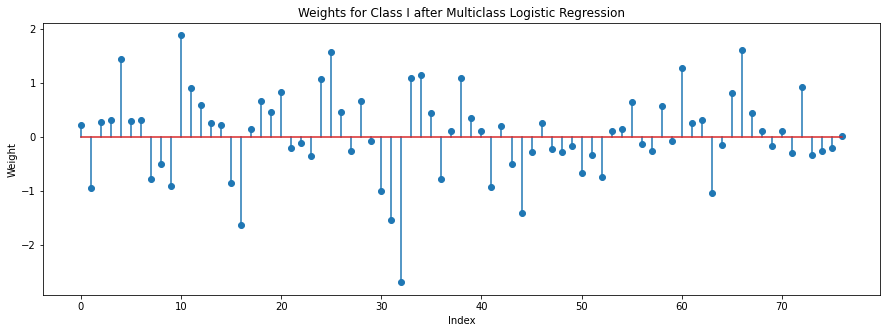

In [19]:
# TODO
logreg = linear_model.LogisticRegression()
logreg.fit(X,y)
W = logreg.coef_

plt.figure(figsize=(15,5))
plt.stem(W[0,:])
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Weights for Class I after Multiclass Logistic Regression')

## L1-Regularization

This section is bonus.

In most genetic problems, only a limited number of the tested genes are likely influence any particular attribute.  Hence, we would expect that the weight coefficients in the logistic regression model should be sparse.  That is, they should be zero on any gene that plays no role in the particular attribute of interest.  Genetic analysis commonly imposes sparsity by adding an l1-penalty term.  Read the `sklearn` [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the `LogisticRegression` class to see how to set the l1-penalty and the inverse regularization strength, `C`.

Using the model selection strategies from the [housing demo](../unit05_lasso/demo2_housing.ipynb), use K-fold cross validation to select an appropriate inverse regularization strength.  
* Use 10-fold cross validation 
* You should select around 20 values of `C`.  It is up to you find a good range.
* Make appropriate plots and print out to display your results
* How does the accuracy compare to the accuracy achieved without regularization.

In [20]:
# TODO
kf = KFold(n_splits=10,shuffle=True)
nfold=10
C = np.logspace(-1,2,20)
err = np.zeros((20,nfold))
n_z = np.zeros((20,nfold))

for i,c in enumerate(C): 
    j=0
    for train,test in kf.split(X):
        Xtr = X[train,:] 
        ytr = y[train]
        Xts = X[test,:]
        yts = y[test] 

        logreg = linear_model.LogisticRegression(penalty='l1',C=c,solver='liblinear',multi_class='ovr')
        logreg.fit(Xtr,ytr)
        yhat = logreg.predict(Xts)

        err[i,j] = np.mean(yhat != yts)
        n_z[i,j] = np.sum(logreg.coef_[0,:] > 0.01)
        j=j+1

[0.04264288 0.04267303 0.03202151 0.03916349 0.02852393 0.01951047
 0.03048533 0.01917807 0.00944263 0.01707323 0.01614407 0.01255987
 0.01988047 0.01035217 0.01079806 0.00907218 0.01114962 0.00828173
 0.00853662 0.00555556]
The minimum error is 0.0074   and C = 100.0000


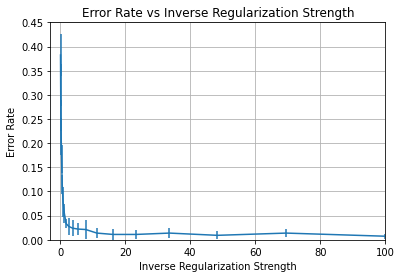

In [18]:
mean_err = np.mean(err,axis=1)
std_err = np.std(err,axis=1)
print(std_err)

plt.figure()
plt.errorbar(C,mean_err,std_err)
plt.xlabel('Inverse Regularization Strength')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Inverse Regularization Strength')
plt.grid()
plt.ylim([0,0.45])
plt.xlim([-3,100])

C_min = C[np.argmin(mean_err)]
min_err = np.min(mean_err)
print('The minimum error is %.4f '%min_err,' and C = %.4f'%C_min)

The test error rate of the classifier with L1 is less than that of classifier that did not use L1, this is because, when we use L1 regulizer, some of the coefficients of logistic regression are made zero as they play no role in predicting the output and a sparse solution should give a better fit.